In [43]:
import pandas as pd
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
%run Data_handle.ipynb

In [45]:
all_data= pd.read_excel('output.xlsx')
# usecols='A:I'
#### Calculates the Gap Time
# all_data.loc[:,'Seq No':'Class'].head()
all_data['Date + Time'] = pd.to_datetime(all_data['Date + Time'])
all_data['Date'] = pd.to_datetime(all_data['Date + Time']).dt.date
all_data['Date'].unique()

all_data['Same Bound'] = all_data['Bound'] == all_data['Bound'].shift(1)
all_data['Same Lane'] = all_data['Lane'] == all_data['Lane'].shift(1)    
# if all_data.loc['Bound'].eq(all_data.loc['Bound'].shift(1)) and all_data.loc['Lane'].eq(all_data.loc['Lane'].shift(1)):
#     all_data['Gap Time'] = all_data['Speed'] * (all_data['Date + Time'].shift(1) - all_data['Date + Time'])
# else:
#     all_data['Gap Time'] = pd.NA


    
filter1 = all_data['Same Bound'] == True
filter2 = all_data['Same Lane'] == True
not_filter1 = all_data['Same Bound'] == False
not_filter2 = all_data['Same Lane'] == False

change = all_data['Date + Time'].diff().dt.seconds
# all_data['Speed'] * (all_data['Date + Time'].shift(1) - all_data['Date + Time'])

all_data.loc[filter1 & filter2, 'Gap Time'] = change
all_data.loc[not_filter1, 'Gap Time'] = pd.NA
all_data.loc[not_filter2, 'Gap Time'] = pd.NA
# all_data = all_data.fillna(all_data['Gap Time'].mean())

cols = ['Gap Time']
all_data.loc[:,cols] = all_data.loc[:,cols].bfill()



/var/folders/py/yncddnwd6kn7d9dzfmz1kcbm0000gn/T/ipykernel_865/1484852226.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Date + Time'] = pd.to_datetime(all_data['Date + Time'])


In [46]:
for i in range(11,27):
    num = (i - 7) // 2
    if i % 2 == 0:
        new_column_name = 'Axle Spacing ' + str(num)
    else:
        new_column_name = 'Axle Weight ' + str(num)
    column_name = 'Unnamed: ' + str(i)
    print(f'{column_name=}, {new_column_name=}')
    all_data.rename(columns={column_name: new_column_name}, inplace=True)
all_data.columns


column_name='Unnamed: 11', new_column_name='Axle Weight 2'
column_name='Unnamed: 12', new_column_name='Axle Spacing 2'
column_name='Unnamed: 13', new_column_name='Axle Weight 3'
column_name='Unnamed: 14', new_column_name='Axle Spacing 3'
column_name='Unnamed: 15', new_column_name='Axle Weight 4'
column_name='Unnamed: 16', new_column_name='Axle Spacing 4'
column_name='Unnamed: 17', new_column_name='Axle Weight 5'
column_name='Unnamed: 18', new_column_name='Axle Spacing 5'
column_name='Unnamed: 19', new_column_name='Axle Weight 6'
column_name='Unnamed: 20', new_column_name='Axle Spacing 6'
column_name='Unnamed: 21', new_column_name='Axle Weight 7'
column_name='Unnamed: 22', new_column_name='Axle Spacing 7'
column_name='Unnamed: 23', new_column_name='Axle Weight 8'
column_name='Unnamed: 24', new_column_name='Axle Spacing 8'
column_name='Unnamed: 25', new_column_name='Axle Weight 9'
column_name='Unnamed: 26', new_column_name='Axle Spacing 9'


Index(['Gap Distance', 'Total Weight', 'Bound', 'Date + Time', 'Seq No',
       'Lane', 'Speed', 'Class', 'No of Axle', 'Axle Weight 1',
       'Axle Spacing 1', 'Axle Weight 2', 'Axle Spacing 2', 'Axle Weight 3',
       'Axle Spacing 3', 'Axle Weight 4', 'Axle Spacing 4', 'Axle Weight 5',
       'Axle Spacing 5', 'Axle Weight 6', 'Axle Spacing 6', 'Axle Weight 7',
       'Axle Spacing 7', 'Axle Weight 8', 'Axle Spacing 8', 'Axle Weight 9',
       'Axle Spacing 9', 'Date', 'Same Bound', 'Same Lane', 'Gap Time'],
      dtype='object')

# Generation of the Stream of Truck Taffic in each Direction 
According to https://arrow.tudublin.ie/cgi/viewcontent.cgi?article=1045&context=engschcivart

#### Pseudo Code
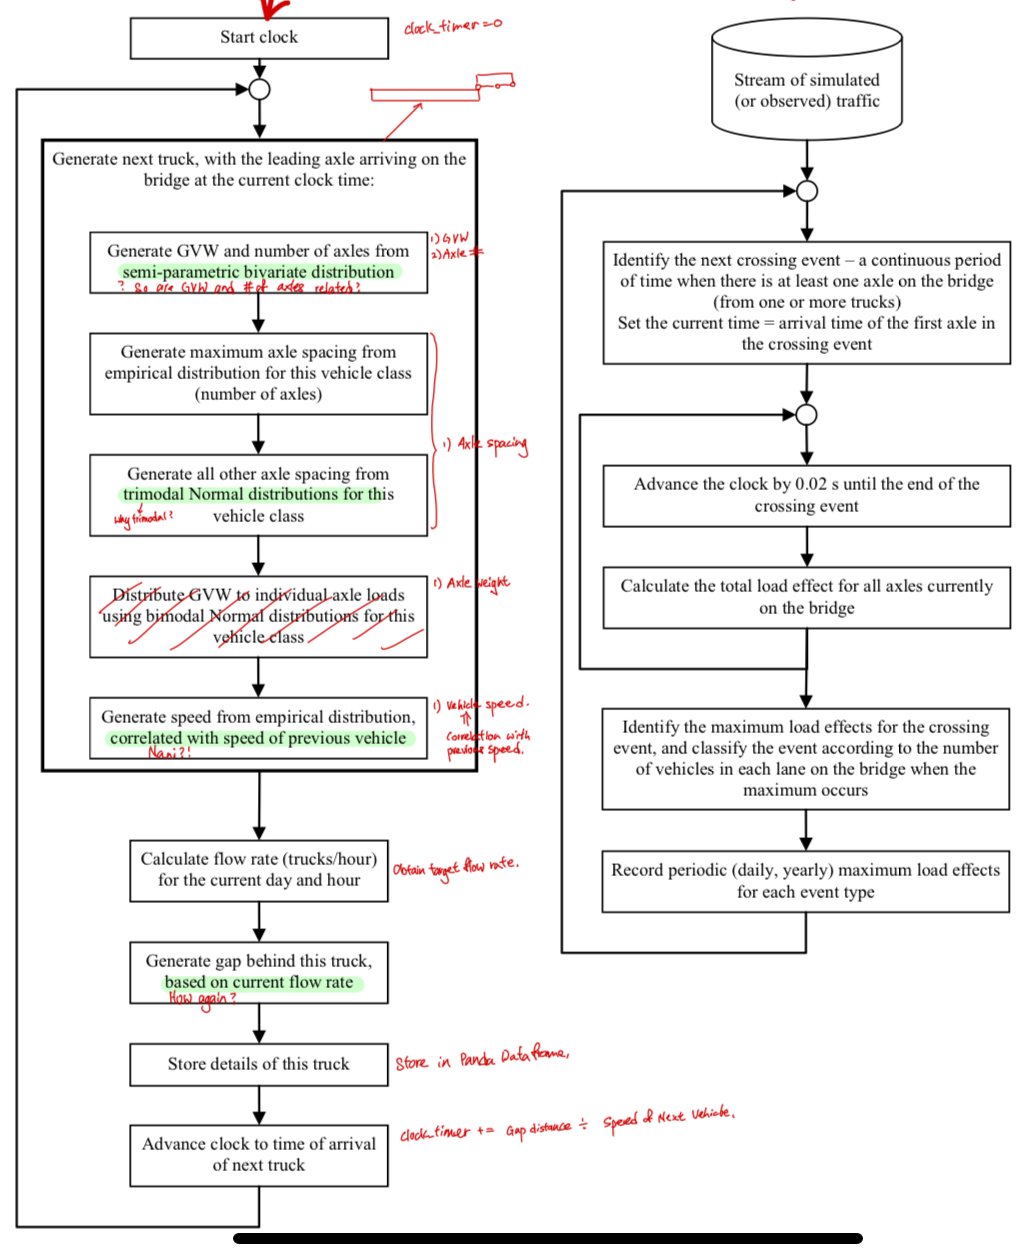

## Imported From 'Data_handle.ipynb'

0     1746.000000
1     1155.000000
2      760.000000
3             NaN
4             NaN
5             NaN
6             NaN
7             NaN
8     4709.000000
9     5161.000000
10    4768.000000
11    3046.000000
12    3073.500000
13    3482.000000
14    3177.000000
15    2696.000000
16    2340.000000
17    2299.500000
18    2262.000000
19    1763.500000
20    1146.000000
21    3839.666667
22    1582.000000
23     658.000000
Name: Average, dtype: float64


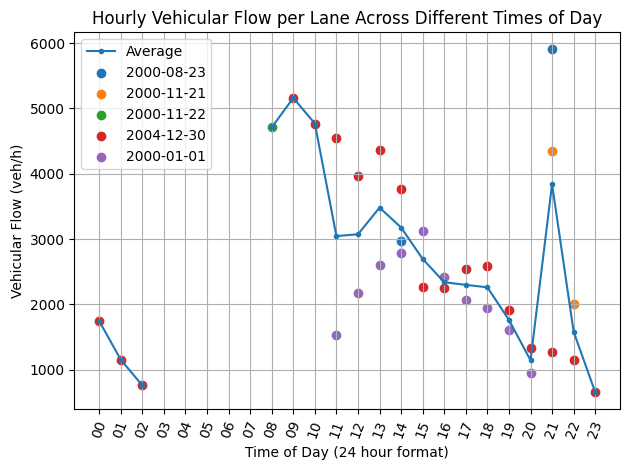

In [47]:
from datetime import time as t

def vehicular_flow_in_hours_setup():
        
    def generate_time(time_list):
        for h in range(24):
            time_list.append(t(h).strftime("%H"))
        return

    # Create the Time column, where it is in the string format of hour:minute in 1 minute increments
    all_data['Time'] = all_data['Date + Time'].dt.floor('h')
    all_data['Time'] = all_data['Time'].dt.strftime("%H")

    # Make a time list to store all the x data from 00:00 to 23:59
    time_list = []
    generate_time(time_list)
    dict = {"Time": time_list}

    # Loops over the number of recorded date
    date_list = all_data['Date'].unique()
    for date in date_list:
        vehicle_flow = []
        # Loops over each minute
        for time in time_list:
            # Tallies the number of vehicle that is recorded in that minute. -> convert the unit from veh/min to veh/hr
            # ? Times 60 for the total numebr of cars to convert: cars per min to cars per hour
            tmp = all_data[(all_data['Date']==date) & (all_data['Time']==time)]
            hourly_flow = len(tmp.index)
            if hourly_flow < 100: 
                hourly_flow = 0
            vehicle_flow.append(hourly_flow)
        dict[date] = vehicle_flow
    # print()
    VF_testing = pd.DataFrame(dict)

    # Finding the Average Values
    VF_testing['Total'] = VF_testing.iloc[:,1:6].sum(axis=1)
    VF_testing['Unique Dates'] = VF_testing.iloc[:,1:6].astype(bool).sum(axis=1)

    VF_testing['Average'] = VF_testing['Total'] / VF_testing['Unique Dates'] 
    
    return VF_testing, time_list, date_list

def average_vehicular_flow():
    VF_testing, time_list, date_list = vehicular_flow_in_hours_setup()
    return VF_testing['Average'], time_list

def vehicular_flow_in_hours_with_average_and_scatter():

    VF_testing, time_list, date_list = vehicular_flow_in_hours_setup()

    # graph plot the average value
    plt.plot(time_list, VF_testing['Average'],'.-', label='Average')
    print(VF_testing['Average'])

    # Scatter Plot
    for date in date_list:
        # removes the time data for when there is no vehicle recorded
        tmp = np.array(VF_testing[date].astype(float))
        tmp[tmp==0] = np.nan
        
        plt.scatter(VF_testing['Time'], tmp, label=date)

    plt.xticks(time_list, rotation=70)
    plt.legend(loc=0)
    plt.grid()
    plt.xlabel('Time of Day (24 hour format)')
    plt.ylabel('Vehicular Flow (veh/h)')
    plt.title('Hourly Vehicular Flow per Lane Across Different Times of Day')
    plt.tight_layout()
    plt.show()
    return 
vehicular_flow_in_hours_with_average_and_scatter()

In [48]:
# * Function Template for finding distribution from dataset, plotting the dataset, and interpolating data
from importlib import reload
import random
from collections import Counter

database = {}

def filter_all_data(vehicle_class_column_name, vehicle_class_value, df=all_data):
    return df[df[vehicle_class_column_name] == vehicle_class_value]

def obtain_distribution(total_weight_column_name, df=all_data):
    # Counts the values within the subset that matches the 
    # print(f'{df[total_weight_column_name]=}')
    tmp = pd.DataFrame(df[total_weight_column_name].value_counts())

    tmp = tmp.sort_values(total_weight_column_name).reset_index()

    tmp.columns = [total_weight_column_name, 'Count']
    total_rows = tmp['Count'].sum()
    
    # calculate the percentage and cumulative probability for each dataset
    tmp['Percentage'] = tmp['Count'] / total_rows
    tmp['Cumulative Probability'] = tmp['Percentage'].cumsum()

    return tmp[[total_weight_column_name, 'Cumulative Probability']]

def add_unit(axis: str):
    if axis == 'Gap Time': 
        axis += ' (s)'
    elif axis == 'Total Weight': 
        axis += ' (kg)'
    elif axis == 'Speed': 
        axis += ' (km/h)'
    elif 'Axle Weight' in axis: 
        axis += ' (kg)'
    elif 'Axle Spacing' in axis: 
        axis += ' (mm)'
    return axis

def plot_distribution(df:pd.DataFrame, additional_string:str = ''):
    import matplotlib.pyplot as plt 

    fig = plt.figure()
    ax = fig.add_subplot()

    fig.suptitle(f'For Cars of {additional_string}:',fontweight='bold')
    x_axis = df.columns[0]
    y_axis = df.columns[-1]
    
    if (x_axis == 'Bound')| (x_axis == 'Date + Time')| (x_axis == 'Seq No')| (x_axis == 'Lane')| (x_axis == 'Class')| (x_axis == 'No of Axle'): 
        ax.bar(df[x_axis], df[y_axis])
    else:
        ax.scatter(df[x_axis], df[y_axis], s=20)

    ax=reload(plt)
    if y_axis == 'Cumulative Probability':
        ax.title(f'CDF of {x_axis}')
    else:
        ax.title(f'{x_axis} against {y_axis}')

    # print(f'{df.iloc[-1,0]}=')
    ax.xlim(0,df.iloc[-1,0])
    
    x_axis = add_unit(x_axis)
    y_axis = add_unit(y_axis)

    ax.xlabel(x_axis)
    ax.ylabel(y_axis)
    ax.grid()
    ax.show()
    return

def generate_and_interpolate_value(dataframe: pd.DataFrame):
    # print(f'{dataframe=}')
    x_axis = dataframe.columns[0]
    y_axis = dataframe.columns[-1]

    # * Generate a random number between 0 and 1
    random_prob = random.random()
    # print(f'{random_prob = }')

    # * Sort the dataframe by cumulative probability column
    sorted_df = dataframe.sort_values(y_axis)

    # * For Dicrete Data
    if (x_axis == 'Bound')| (x_axis == 'Date + Time')| (x_axis == 'Seq No')| (x_axis == 'Lane')| (x_axis == 'Class')| (x_axis == 'No of Axle'): 
        # print('It is discrete')

        # * Loops over the number of data in the datframe
        for index in range(len(dataframe[x_axis])):
            random_prob -= dataframe.iloc[index,-1].astype(float)
            if random_prob <= 0:
                interpolated_value = dataframe.iloc[index,0]
                break
                
    # * For Continuous Data
    else: 
        # print('It is continuous')
        # * Check if random number is larger than the largest value
        if (random_prob <= sorted_df.head(1)[y_axis].astype(float)).values:
            return sorted_df.head(1)[x_axis]
        
        # * Check if random number is smaller than the smallest value
        if (random_prob >= sorted_df.tail(1)[y_axis].astype(float)).values:
            return sorted_df.tail(1)[x_axis]

        # * Interpolated between the closest two data
        # * Find the closest value values based on the random probability
        closest_values = []
        closest_values.append(sorted_df[(sorted_df[y_axis] <= random_prob)].tail(1)[x_axis].values[0])
        closest_values.append(sorted_df[(sorted_df[y_axis] >= random_prob)].head(1)[x_axis].values[0])
        # print(f'{closest_values=}')

        # * Calculate the value value using linear interpolation
        interpolated_value = closest_values[0] + (closest_values[1] - closest_values[0]) * random_prob


    # * Useful!
    # print(f'{random_prob = }, {interpolated_value = }')

    return interpolated_value




def double_filter_and_generate_variable(vehicle_class_key1: str, vehicle_class_value1: int, vehicle_class_key2: str, vehicle_class_value2: int , total_weight_key: str, )-> float :
    
    # * Timesaving techniques!
    # Find the set of queries from the database to see if it is run before or not
    filter_key = f'{str(vehicle_class_key1)} = {str(vehicle_class_value1)} and {str(vehicle_class_key2)} = {str(vehicle_class_value2)}'
    database_key = f'{filter_key} {str(total_weight_key)}'
    # print(f'DATABASE KEY IS {database_key}')

    #* If it has been run before 
    if database_key in database:
        # * call the distribution from database
        distribution = database[database_key]
        # print(f'RECALLED DISTRIBUTION FROM DATABASE WITH KEY {database_key}')

    # * If it has never been run before
    else:
        # * generate the distribution from scratch
        # * filtering the data twice 
        tmp_df = filter_all_data(vehicle_class_key1, vehicle_class_value1)
        tmp_df = filter_all_data(vehicle_class_key2, vehicle_class_value2,df=tmp_df)

        # * Now we count the data that is within the filtered dataframe to create CDF
        distribution = obtain_distribution(total_weight_key, df=tmp_df)
        
        # * Update the database so it has the new query 
        # print(f'ASSIGNED DISTRIBUTION TO DATABASE WITH KEY {database_key}')
        database[database_key] = distribution
    
    # * Return Error when distribution found is empty. 
    if distribution.empty:
        print(f'Dtaframe with key = {total_weight_key} is empty.')
        return

    #* Plots the distribution
    #? plot_distribution(distribution, filter_key)

    #* Generates a random num (0,1), then finds its corresponding value
    output = generate_and_interpolate_value(distribution)

    return output

def generate_variable(vehicle_class_key: str, vehicle_class_value: int , total_weight_key: str, )-> float :
    
    # * Timesaving techniques!
    # Find the set of queries from the database to see if it is run before or not
    filter_key = f'{str(vehicle_class_key)} = {str(vehicle_class_value)}'
    database_key = f'{filter_key} {str(total_weight_key)}'


    #* If it has been run before 
    if database_key in database:
        # * call the distribution from database
        distribution = database[database_key]
        # print(f'RECALLED DISTRIBUTION FROM DATABASE WITH KEY {database_key}')
    
    # * If it has never been run before
    else:
        # * generate the distribution from scratch
        # * filtering the data once
        tmp_df = filter_all_data(vehicle_class_key, vehicle_class_value)
        
        # * Now we count the data that is within the filtered dataframe to create CDF
        distribution = obtain_distribution(total_weight_key, df=tmp_df)
        
        # * Update the database so it has the new query 
        database[database_key] = distribution
    
    # * Return Error when distribution found is empty. 
    if distribution.empty:
        print(f'Dtaframe with key = {total_weight_key} is empty.')
        return
    
    #* Plots the distribution
    #? plot_distribution(distribution, filter_key)

    #* Generates a random num (0,1), then finds its corresponding value
    output = generate_and_interpolate_value(distribution)

    return output


 #! DELETE ME
def axle_distribution_for_each_class() -> pd.DataFrame:
    X = []
    all_vehicle_classes = sorted(all_data['Class'].unique())
    diff_no_of_axles = [1,2,3,4,5,6,7]

    for vehicle_class in all_vehicle_classes:
        tmp = all_data[all_data['Class']== vehicle_class][['Total Weight','Gap Time','No of Axle']]
        X.append(np.array(tmp['No of Axle']))

    df_no_of_axle = pd.DataFrame({'No of Axle':diff_no_of_axles})
    for i in range(len(X)):
        df_no_of_axle[all_vehicle_classes[i]] = Counter(X[i])
        df_no_of_axle[all_vehicle_classes[i]] = df_no_of_axle[all_vehicle_classes[i]] / df_no_of_axle[all_vehicle_classes[i]].sum()
    df_no_of_axle = df_no_of_axle.fillna(0)
    return df_no_of_axle
axle_distribution_for_each_class()


def normalise_axle_weights(axle_weight_list: list):
    sum = 0
    for axle_weight in axle_weight_list:
        sum += axle_weight
    output = []
    for axle_weight in axle_weight_list:
        output.append(axle_weight / sum)
    return output

def distribute_total_weight(axle_weight_list: list, GVW: float):
    output = []
    for axle_weight_proportion in axle_weight_list:
        output.append(axle_weight_proportion * GVW)
    return output

    



In [49]:
all_data.columns

Index(['Gap Distance', 'Total Weight', 'Bound', 'Date + Time', 'Seq No',
       'Lane', 'Speed', 'Class', 'No of Axle', 'Axle Weight 1',
       'Axle Spacing 1', 'Axle Weight 2', 'Axle Spacing 2', 'Axle Weight 3',
       'Axle Spacing 3', 'Axle Weight 4', 'Axle Spacing 4', 'Axle Weight 5',
       'Axle Spacing 5', 'Axle Weight 6', 'Axle Spacing 6', 'Axle Weight 7',
       'Axle Spacing 7', 'Axle Weight 8', 'Axle Spacing 8', 'Axle Weight 9',
       'Axle Spacing 9', 'Date', 'Same Bound', 'Same Lane', 'Gap Time',
       'Time'],
      dtype='object')

In [62]:
all_data
# all_data.head()

# df = all_data[['Gap Time','Lane']]
# print(df)
# plot_distribution(df)

'14'

#### Minor Functions

In [69]:
import random

def determine_HDV_vehicle_class(distribution: list[float])-> None:
    roll = random.uniform(0, 1)
    for veh_class, probability in enumerate(distribution):
        veh_class += 1
        roll -= probability
        if roll <= 0:
            return veh_class 
    return len(distribution)

# Tested
def generate_vehicle_class():
    # truck car bike 

    # HDV, PV, MB, total_trucks,total_cars,total_motorbikes = find_LDV_to_HDV_ratio()
    # proportion = normalise_axle_weights([total_trucks,total_cars,total_motorbikes])
    
    # Hard Code
    proportion = [0.3712258005531302, 0.33457520970949234, 0.29419898973737746]
    
    roll = random.uniform(0, 1)
    if roll < proportion[0]: # HDV
        # * determine detailed class 3-9
        # distribution:list[float] = finding_HDV_class_distribution()
        distribution = [0. , 0.00066519, 0.05264492, 0.07260057, 0.16252772, 0.08653785, 0.1369338 , 0.36487171, 0.12321825]
        output = determine_HDV_vehicle_class(distribution)
        return 'HDV', output
    elif roll < proportion[0] + proportion[1]: # Private Car
        return 'Private Car', 2
    else: # Motorbike
        return 'Motorbike', 1

# Done:
def generate_GVW(vehicle_class: int):
    return generate_variable('Class', vehicle_class, 'Total Weight')

def generate_axle_number(vehicle_class: int):
    return  generate_variable('Class', vehicle_class, 'No of Axle')

def generate_axle_spacing(vehicle_class: int, axle_number: int):
    # finds the axle spacing based on the vehicle_class + axle_number
    # find the subset of data that matches with the right vehicle class, then match with the right axle number
    # find the cumulative probabiility distribution of each/all axle spacing
    output = []
    for spacing_index in range(2,axle_number+1):
        axle_spacing_column_name =  'Axle Spacing '+ str(spacing_index)
        output.append(double_filter_and_generate_variable('Class', vehicle_class,'No of Axle',axle_number,axle_spacing_column_name))
    return output


def generate_axle_weight(vehicle_class: int, axle_number: int, GVW: float):
    output = []
    for spacing_index in range(1,axle_number+1):
        axle_weight_column_name =  'Axle Weight '+ str(spacing_index)
        output.append(double_filter_and_generate_variable('Class', vehicle_class,'No of Axle',axle_number,axle_weight_column_name))
    
    # * normalise and distribute GVW to axle weights. 
    output = normalise_axle_weights(output)
    output = distribute_total_weight(output, GVW)
    return output

def generate_speed(lane_num: int):
    return generate_variable('Lane', lane_num, 'Speed')

def generate_gap_time(vehicle_class: int):
    output = generate_variable('Class', vehicle_class, 'Gap Time')
    if type(output) == pd.Series : 
        output = output.iloc[0]
    return output

def determine_hourly_flow_rate(hour: int):
    # obtain target flow rate based on the hourly flow rate
    
    #* If it has been run before 
    if 'df_avg_veh_flow' in database: 
        df_avg_veh_flow = database['df_avg_veh_flow']
        # print(f'RECALLED DISTRIBUTION FROM DATABASE WITH KEY df_avg_veh_flow')
        time_list = []
        for h in range(24):
            time_list.append(t(h).strftime("%H"))
    
    # * If it has never been run before
    else:
        df_avg_veh_flow, time_list = average_vehicular_flow()
        database['df_avg_veh_flow'] = df_avg_veh_flow

    output = int(df_avg_veh_flow.iloc[hour])

    return output

# TODO:
def vehicle_location_finder():
    # with reference to timer, see if 
    return

# generate_axle_number(6)
# print(generate_axle_spacing(7,6))
# generate_axle_weight(7,6)
# generate_GVW(7)
# generate_speed(2)
# print(determine_hourly_flow_rate(3601))
# print(determine_hourly_flow_rate(24*3600))

# database.keys()

#### Major Functions

In [78]:
# ! Major Functions

def generate_a_vehicle(df_generated_traffic: pd.DataFrame, lane_num: int, timer: int):
    # TODO: maybe find the Gap Time from the vehicles per hour. Make sure Gap Time does not exceed the hour mark. 

    # * Generate each type of attributes of a vehicle
    vehicle_type, vehicle_class = generate_vehicle_class()    
    GVW = generate_GVW(vehicle_class)
    axle_number = generate_axle_number(vehicle_class)
    axle_spacing = generate_axle_spacing(vehicle_class, axle_number)
    axle_weight = generate_axle_weight(vehicle_class, axle_number, GVW)
    speed = generate_speed(lane_num)
    gap_time = generate_gap_time(vehicle_class)

    # print(f'{vehicle_type=}')
    # print(f'{GVW=}')
    # print(f'{axle_number=}')
    # print(f'{axle_spacing=}')
    # print(f'{axle_weight=}')
    # print(f'{speed=}')
    # print(f'{gap_time=}')

    # * updates timer
    total = timer + gap_time
    if total > 3600:
        timer = 3600
    else:
        timer += gap_time

    hour = timer % 3600
    minute = timer %
    second = 

    # * Store the vehicle attribute into the dataframe
    new_vehicle_dict = {'Lane':[lane_num],'Vehicle Type':[ vehicle_type] ,'Vehicle Class':[vehicle_class] , 'GVW':[GVW] , 'Axle_Number':[axle_number] , 'Axle_Spacing':[axle_spacing] , 'Axle_Weight':[axle_weight] , 'Speed':[speed] , 'Gap_Time':[gap_time], 'Hour':[hour], 'Minute': [minute], 'Second': [second]}
    print(f'{new_vehicle_dict=}')
    df_new_vehicle = pd.DataFrame(new_vehicle_dict)
    df_generated_traffic = pd.concat([df_generated_traffic, df_new_vehicle])

    return df_generated_traffic, timer
# Testing

def generate_daily_vehicle_stream(df_generated_traffic): # According to Fig 7(a)
    timer = 0
    # for _ in range(24):
    hours_in_a_day = 1
    total_lane = 1
    # * Loops over every hour of the day
    for lane_num in range(1,total_lane+1):
        for hour in range(hours_in_a_day):
            while True: 
                # * Determine the number of vehicles to generate for the hour. 
                vehicles_per_hour = determine_hourly_flow_rate(hour)

                # * Generate that number of vehicles
                for _ in range(vehicles_per_hour):
                    df_generated_traffic, timer = generate_a_vehicle(df_generated_traffic, lane_num, timer)

                # * if timer > an hour -> start the timer again set to (the vehicle Gap Time - remaning orange bit) * speed
                if timer >= 3600: 
                    timer = timer - (60 * 60)
                    break
            # total_gap_time = df_generated_traffic[df_generated_traffic['Hour']== hour]['Gap Time'].sum()
            # df_generated_traffic[df_generated_traffic['Hour']== hour]['Gap Time'] *= (3600 / total_gap_time)
    return df_generated_traffic

def Monte_Carlo_Simulation(df_generated_traffic):
    # generate vehicle stream
    df_generated_traffic = generate_daily_vehicle_stream(df_generated_traffic)
    # obtain load effect with influence lines 
    # store loading effect + update the top 10% threshold 
    # store traffic traffic configuration values OR only store the top 1 loading values
    return df_generated_traffic

def main():
    df_generated_traffic = pd.DataFrame({'Lane': [], 'Vehicle Type': [], 'Vehicle Class': [], 'GVW': [], 'Axle_Number': [], 'Axle_Spacing': [], 'Axle_Weight': [], 'Speed': [], 'Gap_Time': []})
    df_generated_traffic = Monte_Carlo_Simulation(df_generated_traffic)
    print(f'{df_generated_traffic=}')

    return df_generated_traffic

df_generated_traffic = main()

new_vehicle_dict={'Lane': [1], 'Vehicle Type': ['Private Car'], 'Vehicle Class': [2], 'GVW': [1846.893464814197], 'Axle_Number': [2], 'Axle_Spacing': [[250.35968851164114]], 'Axle_Weight': [[974.2445674550186, 872.6488973591784]], 'Speed': [58.177118024135055], 'Gap_Time': [4.853446408435212]}
new_vehicle_dict={'Lane': [1], 'Vehicle Type': ['HDV'], 'Vehicle Class': [8], 'GVW': [18686.10484931361], 'Axle_Number': [2], 'Axle_Spacing': [[588.6140608989955]], 'Axle_Weight': [[5750.967523461993, 12935.13732585162]], 'Speed': [57.16200008708524], 'Gap_Time': [2.738376065938636]}
new_vehicle_dict={'Lane': [1], 'Vehicle Type': ['HDV'], 'Vehicle Class': [9], 'GVW': [55102.36402774297], 'Axle_Number': [2], 'Axle_Spacing': [[264.04311081430194]], 'Axle_Weight': [[34878.17745749115, 20224.18657025182]], 'Speed': [75.49954863763323], 'Gap_Time': [0.24251612206719508]}
new_vehicle_dict={'Lane': [1], 'Vehicle Type': ['HDV'], 'Vehicle Class': [7], 'GVW': [14511.231091300013], 'Axle_Number': [5], 'Axle

In [80]:
df_generated_traffic.head()


,Lane,Vehicle Type,Vehicle Class,GVW,Axle_Number,Axle_Spacing,Axle_Weight,Speed,Gap_Time,Hour,Seconds
0,1.0,Private Car,2.0,1846.893465,2.0,[250.35968851164114],"[974.2445674550186, 872.6488973591784]",58.177118,4.853446,0.0,4.853446
0,1.0,HDV,8.0,18686.104849,2.0,[588.6140608989955],"[5750.967523461993, 12935.13732585162]",57.162,2.738376,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.591822
0,1.0,HDV,9.0,55102.364028,2.0,[264.04311081430194],"[34878.17745749115, 20224.18657025182]",75.499549,0.242516,NaN,NaN
